## Movielens

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

Data available from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [2]:
path='/home/akash/data/ml-latest-small/'

We're working with the movielens data, which contains one rating per row, like this:

In [3]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Just for display purposes, let's read in the movie names too.

In [4]:
movies = pd.read_csv(path+'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Create subset for Excel

We create a crosstab of the most popular movies and most movie-addicted users which we'll copy into Excel for creating a simple example. This isn't necessary for any of the modeling below however.

In [5]:
ratings.groupby('userId')['rating'].count().sort_values(ascending=False)[:5]

userId
414    2698
599    2478
474    2108
448    1864
274    1346
Name: rating, dtype: int64

In [6]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:15]

g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]

In [7]:
print(type(topUsers))
topUsers

<class 'pandas.core.series.Series'>


userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
Name: rating, dtype: int64

In [8]:
topMovies

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
2959    218
1       215
1196    211
50      204
2858    204
Name: rating, dtype: int64

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')

In [11]:
top_r.head()

,userId,movieId,rating,timestamp,rating_r
10360,68,1,2.5,1158531426,1260
10361,68,2,2.5,1158532776,1260
10362,68,3,2.0,1158533415,1260
10363,68,5,2.0,1158533624,1260
10364,68,6,4.0,1158532058,1260


In [12]:
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')
top_r.head()

,userId,movieId,rating,timestamp,rating_r,rating_r
10360,68,1,2.5,1158531426,1260,215
26092,182,1,4.0,1063289621,977,215
36374,249,1,4.0,1347317775,1046,215
39229,274,1,4.0,1171410158,1346,215
42114,288,1,4.5,1054568869,1055,215


In [13]:
pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


## Collaborative filtering ON ENTIRE DATA

In [35]:
val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors = 50

In [36]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [37]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                  
    0      0.757268   0.774132  
    1      0.729112   0.752798                                  
    2      0.573759   0.739858                                  



[array([0.73986])]

Let's compare to some benchmarks. Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on [RMSE](http://www.statisticshowto.com/rmse/) of 0.91. We'll need to take the square root of our loss, since we use plain MSE.

In [38]:
math.sqrt(0.736)

0.8579044235810886

Looking good - we've found a solution better than any of those benchmarks! Let's take a look at how the predictions compare to actuals for this model.

In [39]:
preds = learn.predict()

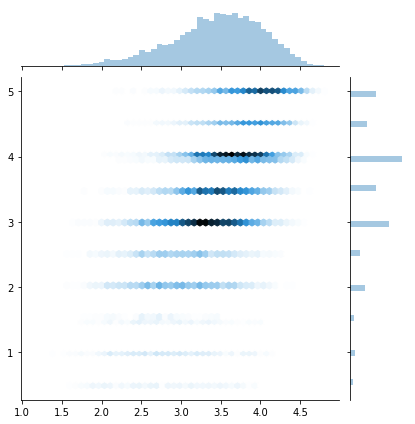

In [40]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

## Analyze results  (for top movies only)

### Movie bias

In [20]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
movie_names = movies.set_index('movieId')['title'].to_dict()
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False).index.values[:3000]

In [22]:
g.sort_values(ascending=False)[:5]

movieId
356     329
318     317
296     307
593     279
2571    278
Name: rating, dtype: int64

In [23]:
g.sort_values(ascending=False)[:5].index.values

array([ 356,  318,  296,  593, 2571])

In [24]:
topMovieIdx = np.array([cf.item2idx[o] for o in topMovies])

In [25]:
topMovieIdx

array([  20,  232,   16, ..., 5907,  607, 3582])

In [42]:
m=learn.model; m.cuda()

EmbeddingDotBias(
  (u): Embedding(610, 50)
  (i): Embedding(9724, 50)
  (ub): Embedding(610, 1)
  (ib): Embedding(9724, 1)
)

In [43]:
m

EmbeddingDotBias(
  (u): Embedding(610, 50)
  (i): Embedding(9724, 50)
  (ub): Embedding(610, 1)
  (ib): Embedding(9724, 1)
)

##### so topMovies have only 3000 movies whereas there are a total of 9724 moves, and 610 users

In [60]:
len(movies), len(topMovies), ratings.userId.nunique()

(9742, 3000, 610)

First, we'll look at the movie bias term. Here, our input is the movie id (a single id), and the output is the movie bias (a single float). 
#### Movie bias is an embedding a lookup table containing 9724 entries. USer bias is an embedding containing 610 entries.
#### Wheres 

In [66]:
m.ib, m.ub, m.i , m.u

(Embedding(9724, 1),
 Embedding(610, 1),
 Embedding(9724, 50),
 Embedding(610, 50))

In [69]:
top_movie_bias = to_np(m.ib(V(topMovieIdx)))

In [70]:
top_movie_bias

array([[ 0.90774],
       [ 1.28779],
       [ 0.88195],
       ...,
       [-0.2985 ],
       [ 0.10351],
       [ 0.08915]], dtype=float32)

In [73]:
movie_ratings = [(b, movie_names[i]) for i,b in zip(topMovies,np.squeeze(top_movie_bias))]

Now we can look at the top and bottom rated movies. These ratings are corrected for different levels of reviewer sentiment, as well as different types of movies that different reviewers watch.

In [74]:
sorted(movie_ratings, key=lambda o: o[0])[:15]

[(-0.70503545, 'Speed 2: Cruise Control (1997)'),
 (-0.6801507, 'Problem Child (1990)'),
 (-0.67842776, 'Anaconda (1997)'),
 (-0.67598933, 'Catwoman (2004)'),
 (-0.6591454, 'Godzilla (1998)'),
 (-0.658352, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.633509, 'Spice World (1997)'),
 (-0.6323859, 'Karate Kid, Part III, The (1989)'),
 (-0.63097185, 'Batman & Robin (1997)'),
 (-0.6237219, 'Honey, I Blew Up the Kid (1992)'),
 (-0.6037559, 'I Still Know What You Did Last Summer (1998)'),
 (-0.6030693, 'Scary Movie 3 (2003)'),
 (-0.5947168, 'Superman IV: The Quest for Peace (1987)'),
 (-0.5686942, 'Battlefield Earth (2000)'),
 (-0.5657382, 'Jason X (2002)')]

In [75]:
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.70503545, 'Speed 2: Cruise Control (1997)'),
 (-0.6801507, 'Problem Child (1990)'),
 (-0.67842776, 'Anaconda (1997)'),
 (-0.67598933, 'Catwoman (2004)'),
 (-0.6591454, 'Godzilla (1998)'),
 (-0.658352, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.633509, 'Spice World (1997)'),
 (-0.6323859, 'Karate Kid, Part III, The (1989)'),
 (-0.63097185, 'Batman & Robin (1997)'),
 (-0.6237219, 'Honey, I Blew Up the Kid (1992)'),
 (-0.6037559, 'I Still Know What You Did Last Summer (1998)'),
 (-0.6030693, 'Scary Movie 3 (2003)'),
 (-0.5947168, 'Superman IV: The Quest for Peace (1987)'),
 (-0.5686942, 'Battlefield Earth (2000)'),
 (-0.5657382, 'Jason X (2002)')]

In [76]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(1.2877862, 'Shawshank Redemption, The (1994)'),
 (0.97506833, 'Usual Suspects, The (1995)'),
 (0.9099419, 'Goodfellas (1990)'),
 (0.90774065, 'Forrest Gump (1994)'),
 (0.8942717, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.88649637,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.8819496, 'Pulp Fiction (1994)'),
 (0.8811493, "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)"),
 (0.86572796, 'American History X (1998)'),
 (0.8616804, 'Matrix, The (1999)'),
 (0.853675, "Schindler's List (1993)"),
 (0.8487932, 'Fight Club (1999)'),
 (0.83149654, 'Casablanca (1942)'),
 (0.8234759, 'Princess Bride, The (1987)'),
 (0.8153509, 'Departed, The (2006)')]

### Embedding interpretation

We can now do the same thing for the embeddings.

In [77]:
movie_emb = to_np(m.i(V(topMovieIdx)))
movie_emb.shape

(3000, 50)

Because it's hard to interpret 50 embeddings, we use [PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/) to simplify them down to just 3 vectors. 

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [82]:
movie_pca.shape

(3, 3000)

In [83]:
# get first principal Component for 3000 movies
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac0, topMovies)]

Here's the 1st component. It seems to be 'easy watching' vs 'serious'.

In [84]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.09107976, 'Godfather, The (1972)'),
 (0.08549399, 'Pulp Fiction (1994)'),
 (0.07474238, 'Memento (2000)'),
 (0.074246384, "Schindler's List (1993)"),
 (0.06898195, 'Big Lebowski, The (1998)'),
 (0.068868525, 'Godfather: Part II, The (1974)'),
 (0.06715897, 'Monty Python and the Holy Grail (1975)'),
 (0.066928685, 'Fight Club (1999)'),
 (0.06540912, 'Apocalypse Now (1979)'),
 (0.06259969, 'American Beauty (1999)')]

In [85]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.07156342, 'Congo (1995)'),
 (-0.057346035, 'Twister (1996)'),
 (-0.05554538, "Big Momma's House (2000)"),
 (-0.053265285, 'Independence Day (a.k.a. ID4) (1996)'),
 (-0.052435264, 'Broken Arrow (1996)'),
 (-0.04929844, 'First Knight (1995)'),
 (-0.04848505, 'Con Air (1997)'),
 (-0.048041563, 'Catwoman (2004)'),
 (-0.04742916, 'Sister Act 2: Back in the Habit (1993)'),
 (-0.046617385, 'Kazaam (1996)')]

In [86]:
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac1, topMovies)]

Here's the 2nd component. It seems to be 'CGI' vs 'dialog driven'.

In [93]:
sorted(movie_comp, key=lambda x: x[0], reverse=True)[:10]

[(0.108862616, 'Matrix, The (1999)'),
 (0.09811767,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.08984186, 'True Lies (1994)'),
 (0.08767125, 'Die Hard (1988)'),
 (0.08752918, 'Back to the Future (1985)'),
 (0.08609151, 'Speed (1994)'),
 (0.0856425, 'Saving Private Ryan (1998)'),
 (0.08539287, 'Spider-Man (2002)'),
 (0.085325964, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.08506256, 'Independence Day (a.k.a. ID4) (1996)')]

In [88]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.057257686, 'Judge Dredd (1995)'),
 (-0.053781804, 'All About My Mother (Todo sobre mi madre) (1999)'),
 (-0.05324711, 'Battlefield Earth (2000)'),
 (-0.051117964, 'Eyes Wide Shut (1999)'),
 (-0.050963543, 'Mulholland Drive (2001)'),
 (-0.049076673, 'Into the Wild (2007)'),
 (-0.04870924, 'Talented Mr. Ripley, The (1999)'),
 (-0.048398826, 'Predator 2 (1990)'),
 (-0.047668535, 'Election (1999)'),
 (-0.047161512, 'Kill Bill: Vol. 2 (2004)')]

Factor 3

In [94]:
fac2 = movie_pca[2]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac2, topMovies)]
sorted(movie_comp, key=lambda x: x[0], reverse=True)[:10], sorted(movie_comp, key=lambda x: x[0])[:10]

([(0.102029, 'Wizard of Oz, The (1939)'),
  (0.09135665, 'E.T. the Extra-Terrestrial (1982)'),
  (0.08915978, 'Sound of Music, The (1965)'),
  (0.087254226, "Breakfast at Tiffany's (1961)"),
  (0.085737176, 'Aristocats, The (1970)'),
  (0.08179645, "Schindler's List (1993)"),
  (0.08030635, 'Mrs. Doubtfire (1993)'),
  (0.08000119, 'Aladdin (1992)'),
  (0.07544861, 'Back to the Future Part III (1990)'),
  (0.07529304, 'Ghost (1990)')],
 [(-0.07933924, 'Pulp Fiction (1994)'),
  (-0.079148255, 'Blade II (2002)'),
  (-0.074864574, 'Starship Troopers (1997)'),
  (-0.07310868, 'Fifth Element, The (1997)'),
  (-0.07286304, '300 (2007)'),
  (-0.06944655, 'Star Wars: Episode I - The Phantom Menace (1999)'),
  (-0.063291006, 'Matrix Revolutions, The (2003)'),
  (-0.06038347, 'Road Warrior, The (Mad Max 2) (1981)'),
  (-0.05886971, 'Star Wars: Episode II - Attack of the Clones (2002)'),
  (-0.058349248, 'Matrix Reloaded, The (2003)')])

We can draw a picture to see how various movies appear on the map of these components. This picture shows the first two components.

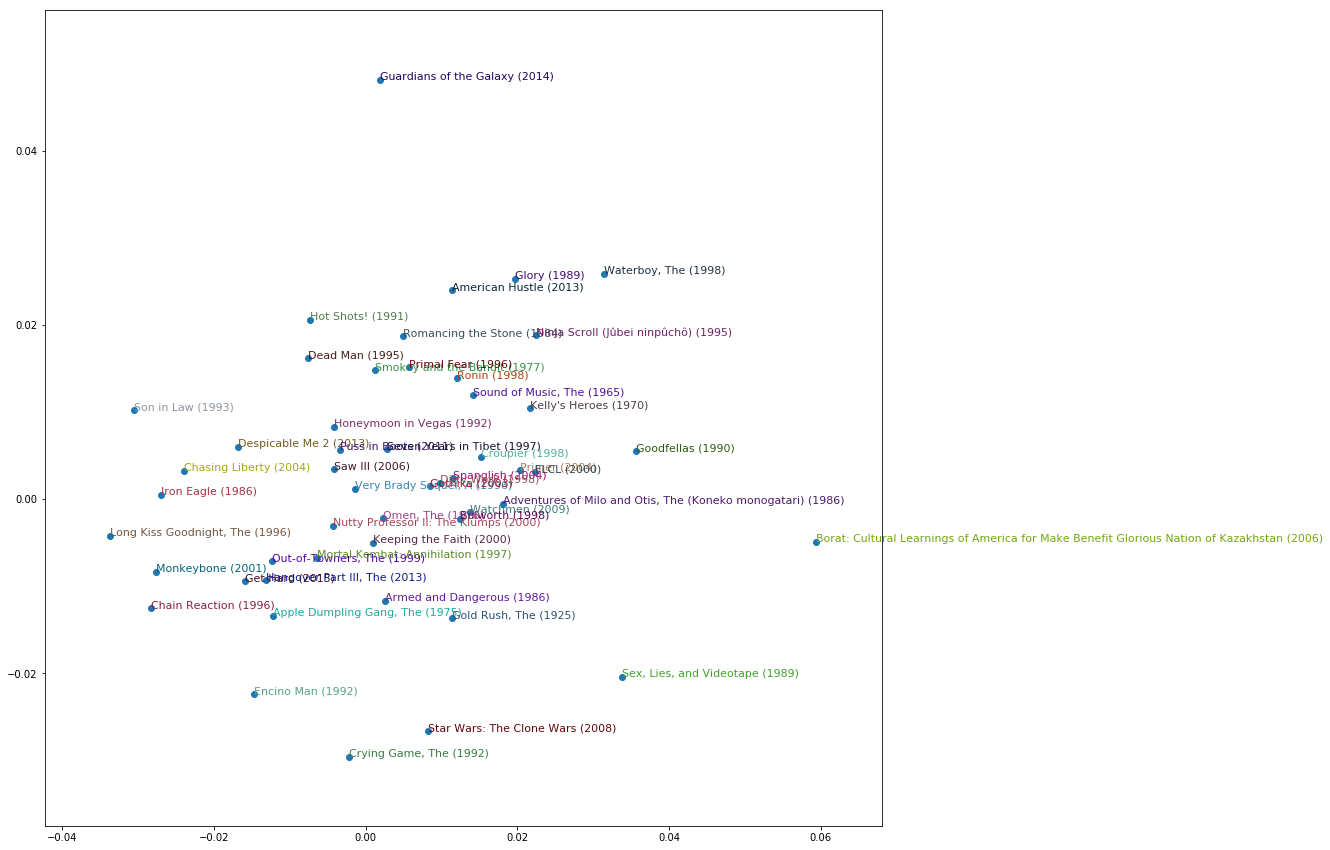

In [97]:
idxs = np.random.choice(len(topMovies), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[idxs], X, Y):
    plt.text(x,y,movie_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## Collab filtering from scratch

### Dot product example

In [103]:
T

<function fastai.core.T(a, half=False, cuda=True)>

In [99]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a,b

(
  1  2
  3  4
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)], 
   2   2
  10  10
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)])

In [106]:
a*b


  2   4
 30  40
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

In [107]:
(a*b).sum(1)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [108]:
class DotProduct(nn.Module):
    def forward(self, u, m): return (u*m).sum(1)

In [109]:
model=DotProduct()

In [110]:
model(a,b)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [111]:
a = T([[1,2,1],[1,1,1], [1,0,0]])
b = T([[1,0,1],[1,2,2], [2,3,4]])
a, b

(
  1  2  1
  1  1  1
  1  0  0
 [torch.cuda.LongTensor of size 3x3 (GPU 0)], 
  1  0  1
  1  2  2
  2  3  4
 [torch.cuda.LongTensor of size 3x3 (GPU 0)])

In [113]:
model(a,b)


 2
 5
 2
[torch.cuda.LongTensor of size 3 (GPU 0)]

### Dot product model

In [114]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [115]:
u_uniq = ratings.userId.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

m_uniq = ratings.movieId.unique()
movie2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: movie2idx[x])

n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())

n_users, n_movies

(610, 9724)

In [136]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_movies, n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
    
    # the cat_flds from ColumnarModelData.from_data_frame will be passed to forward as cats
    #, and other fields are passed in conts
    def forward(self, cats, conts):
        #print(cats)
        users,movies = cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1).view(-1, 1)

In [137]:
ratings.head()

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,1,4.0,964981247
2,0,2,4.0,964982224
3,0,3,5.0,964983815
4,0,4,5.0,964982931


In [138]:
x = ratings.drop(['rating', 'timestamp'],axis=1)
y = ratings['rating'].astype(np.float32)

In [139]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, cat_flds = ['userId', 'movieId'], bs=64)

In [140]:
wd=1e-5
model = EmbeddingDot(n_users, n_movies).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [141]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                 
    0      1.593563   1.601816  
    1      1.098646   1.289171                                 
    2      0.873292   1.235277                                  



[array([1.23528])]

In [142]:
set_lrs(opt, 0.01)

In [143]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                  
    0      0.700786   1.151652  
    1      0.680405   1.139234                                  
    2      0.681591   1.134473                                  



[array([1.13447])]

### Bias

In [144]:
min_rating,max_rating = ratings.rating.min(),ratings.rating.max()
min_rating,max_rating

(0.5, 5.0)

In [146]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        (self.u, self.m, self.ub, self.mb) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors), (n_users,1), (n_movies,1)
        ]]
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(movies)).sum(1)
        res = um + self.ub(users).squeeze() + self.mb(movies).squeeze()
        res = F.sigmoid(res) * (max_rating-min_rating) + min_rating
        return res.view(-1, 1)

In [147]:
wd=2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [148]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                  
    0      0.778214   0.811286  
    1      0.768408   0.796612                                  
    2      0.750566   0.791206                                  



[array([0.79121])]

In [149]:
set_lrs(opt, 1e-2)

In [150]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                  
    0      0.731916   0.782623  
    1      0.688263   0.781179                                  
    2      0.728064   0.780233                                  



[array([0.78023])]

### Mini net

In [151]:
class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        x = F.sigmoid(self.lin2(x))
        return  x * (max_rating-min_rating+1) + min_rating-0.5

In [152]:
wd=1e-5
model = EmbeddingNet(n_users, n_movies).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)

In [153]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                  
    0      0.829762   0.790489  
    1      0.789001   0.772858                                  
    2      0.753231   0.766982                                  



[array([0.76698])]

In [154]:
set_lrs(opt, 1e-3)

In [155]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                  
    0      0.755194   0.765916  
    1      0.727905   0.76952                                   
    2      0.725355   0.771641                                  



[array([0.77164])]